In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [48]:
df_train.sample(5)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
9270,52261,27,Male,7,Media,6603,Fair,High,Average,1,...,1,Entry,Medium,55,No,No,No,Good,Low,Left
41981,6377,54,Male,3,Technology,9413,Poor,High,Average,0,...,3,Entry,Medium,68,No,No,No,Good,High,Left
43262,68788,42,Male,14,Media,5191,Excellent,High,Below Average,0,...,1,Senior,Medium,24,No,No,No,Poor,High,Stayed
3910,4194,54,Male,44,Technology,9853,Excellent,High,Average,0,...,0,Mid,Medium,75,No,No,No,Excellent,Low,Stayed
1492,3724,52,Female,13,Technology,12569,Excellent,Very High,Below Average,2,...,0,Entry,Medium,87,No,No,No,Poor,High,Stayed


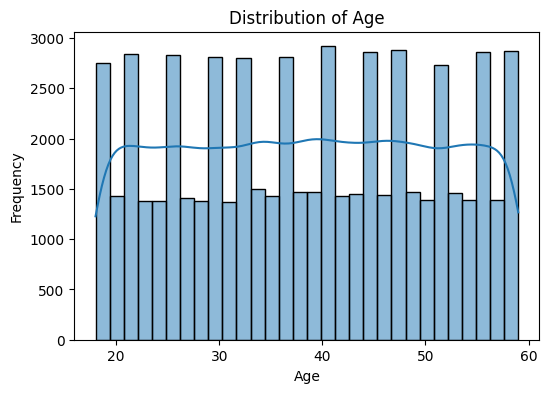

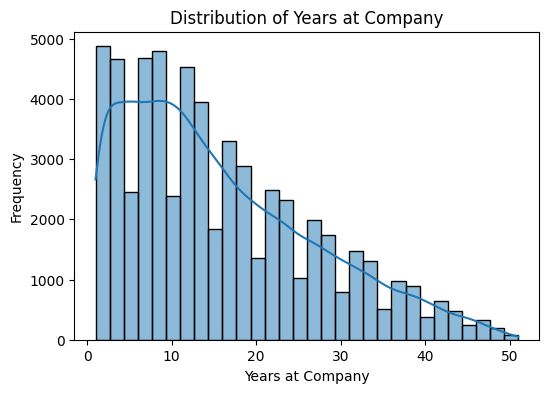

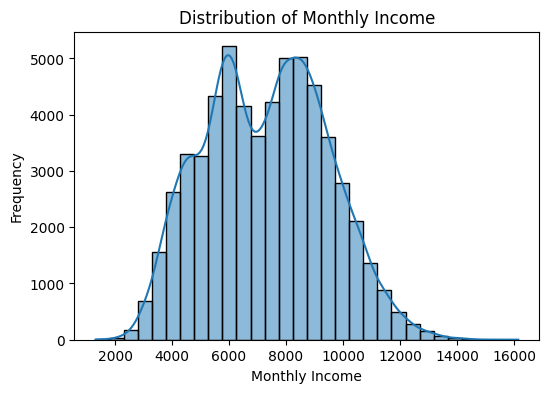

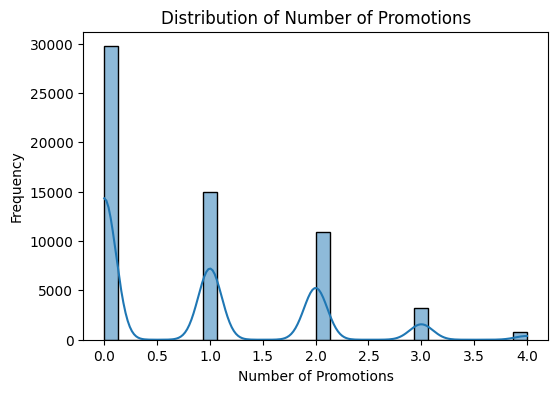

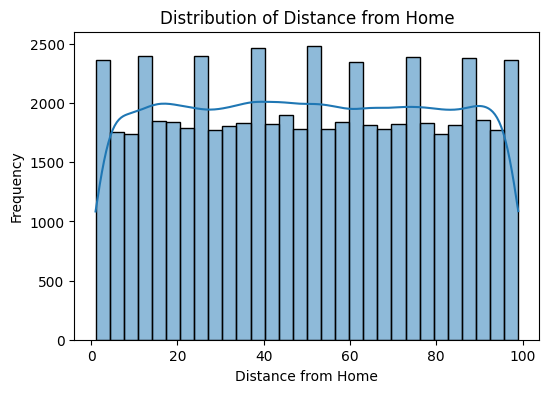

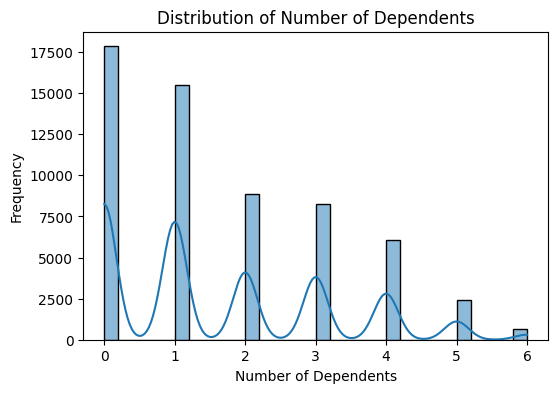

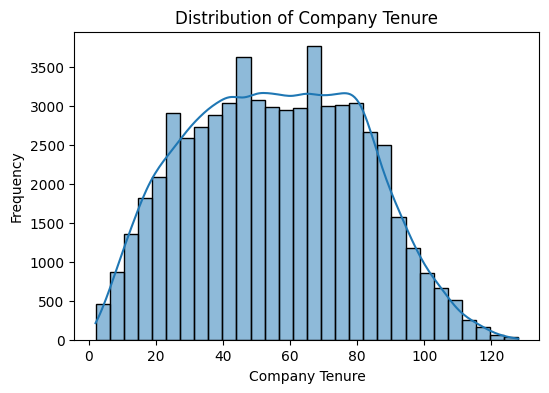

In [16]:
# Select numerical columns
numerical_features = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
                      'Distance from Home', 'Number of Dependents', 'Company Tenure']

# Plot histograms for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_train[feature], kde=True, bins=30)  # KDE=True adds a density curve
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [21]:
from scipy.stats import shapiro, kstest
import numpy as np

# Example for a feature
stat, p = shapiro(df_train['Years at Company'])  # Shapiro-Wilk test
print("Shapiro-Wilk Test: p-value =", p)

stat, p = kstest(df_train['Years at Company'], 'norm', args=(df_train['Years at Company'].mean(), df_train['Years at Company'].std()))
print("Kolmogorov-Smirnov Test: p-value =", p)


Shapiro-Wilk Test: p-value = 2.6502031922466855e-91
Kolmogorov-Smirnov Test: p-value = 0.0


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [7]:
# Separate numerical and categorical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns

# Print the results
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')


In [39]:
df_train['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
High,29779
Very High,12111
Medium,11817
Low,5891


In [46]:
print(df_train['Job Satisfaction'].unique())


['Medium' 'High' 'Very High' 'Low']


In [24]:
y=df_train['Attrition']
df_train = df_train.drop(columns=['Attrition','Employee ID'])


In [25]:
y_test=df_test['Attrition']
df_test = df_test.drop(columns=['Attrition','Employee ID'])


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
#'category_onehot': ['Job Role', 'Marital Status', 'A', 'C'],
#'category_label': ['Gender', 'Overtime', 'Remote Work', 'Leadership Opportunities','Innovation Opportunities',],
#'Work-Life Balance': ['Poor','Fair','Good','Excellent']
#'Job Satisfaction': ['Low','Medium','High',' Very High']
#'Performance Rating': ['Low','Below Average','Average','High']
#'Education Level': ['High School','Associate Degree',"Bachelor's degree",  "Master's Degree", 'PhD'],
#'Job Level': ['Entry','Mid','Senior']
#'Company Size': ['Small','Medium','Large']
#'Company Reputation': ['Poor','Fair','Good','Excellent']
#'Employee Recognition': ['Low','Medium','High',' Very High']

numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Define column groups
onehot_columns = ['Job Role', 'Marital Status']
label_columns = ['Gender', 'Overtime', 'Remote Work', 'Leadership Opportunities','Innovation Opportunities']
ordinal_columns = ['Work-Life Balance', 'Job Satisfaction','Performance Rating','Education Level','Job Level','Company Size','Company Reputation','Employee Recognition']
ordinal_categories = [
    ['Poor','Fair','Good','Excellent'],
    ['Low', 'Medium', 'High','Very High'],
    ['Low','Below Average','Average','High'],
    ["High School", "Associate Degree", "Bachelor’s Degree", "Master’s Degree", "PhD"],
    ['Entry','Mid','Senior'],
    ['Small','Medium','Large'],
    ['Poor','Fair','Good','Excellent'],
    ['Low','Medium','High',' Very High']
]

# Encode the target column
le = LabelEncoder()
target_column_train = le.fit_transform(y)
target_column_test = le.transform(y_test)

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), onehot_columns),
        ('label', OrdinalEncoder(), label_columns),  # Label Encoding using OrdinalEncoder
        ('ordinal', OrdinalEncoder(categories=ordinal_categories,handle_unknown='use_encoded_value', unknown_value=-1), ordinal_columns)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Transform the data
train_transformed_data = preprocessor.fit_transform(df_train)
test_transformed_data = preprocessor.transform(df_test)
# Get one-hot encoded column names
onehot_features = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_columns).tolist()

#print(f"One-hot encoded columns: {len(onehot_features)}")
#print(f"Label encoded columns: {len(label_columns)}")
#print(f"Ordinal encoded columns: {len(ordinal_columns)}")
#print(f"Numerical columns: {len(numerical_columns)}")
# Convert to DataFrame
column_names = (
    onehot_features
    + label_columns
    + ordinal_columns
    + numerical_columns.tolist()  # Keep numeric features
)

# Debugging: Print total number of column names
#print(f"Total column names: {len(column_names)}")
#print(f"Transformed data shape: {transformed_data.shape}")

df_train_transformed = pd.DataFrame(train_transformed_data, columns=column_names)
df_test_transformed = pd.DataFrame(test_transformed_data, columns=column_names)

# Add the target column to the transformed DataFrames
y = target_column_train
y_test= target_column_test



In [71]:
# Get all transformed column names
transformed_columns = df_train_transformed.columns.tolist()

# Print all column names
print("Transformed Column Names:")
for col in transformed_columns:
    print(col)

Transformed Column Names:
Job Role_Education
Job Role_Finance
Job Role_Healthcare
Job Role_Media
Job Role_Technology
Marital Status_Divorced
Marital Status_Married
Marital Status_Single
Gender
Overtime
Remote Work
Leadership Opportunities
Innovation Opportunities
Work-Life Balance
Job Satisfaction
Performance Rating
Education Level
Job Level
Company Size
Company Reputation
Employee Recognition
Age
Years at Company
Monthly Income
Number of Promotions
Distance from Home
Number of Dependents
Company Tenure


In [27]:
X=df_train_transformed
X_test=df_test_transformed

In [36]:
df_train_transformed.head()

,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender,Overtime,...,Company Reputation,Employee Recognition,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3.0,1.0,8410.0,31.0,19.0,5390.0,2.0,22.0,0.0,89.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,64756.0,59.0,4.0,5534.0,3.0,21.0,3.0,21.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,30257.0,24.0,10.0,8159.0,0.0,11.0,3.0,74.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,65791.0,36.0,7.0,3989.0,1.0,27.0,2.0,50.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,65026.0,56.0,41.0,4821.0,0.0,71.0,0.0,68.0


In [73]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
59593    0
59594    0
59595    1
59596    0
59597    1
Name: Attrition, Length: 59598, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X)

# Transform X_val and X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X,y)



RandomForestClassifier(random_state=42)

In [8]:
y_pred=rf.predict(X_test)

In [9]:
import sklearn.metrics as metrics
score=metrics.accuracy_score(y_test,y_pred)
print(score)

0.7514093959731544


In [28]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM classifier
lgbm = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    is_unbalance=True,
    metric='auc',
    random_state=42,
    verbose=-1  # ✅ Correct way to set verbosity
)

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Set up RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2  # ✅ Only here, not in `.fit()`
)

# Fit the model with correct early stopping
randomized_search.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(10)]  # ✅ Correct way to use early stopping
)

# Get the best parameters
best_params = randomized_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = randomized_search.best_estimator_




Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[184]	valid_0's auc: 0.846094
Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [29]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters from RandomizedSearchCV
best_params = {
   'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8
}

# Create the final LightGBM model with the best hyperparameters
final_model = lgb.LGBMClassifier(
    **best_params,  # Unpack best hyperparameters
    is_unbalance=True,  # Handle class imbalance
    boosting_type="gbdt",  # Standard gradient boosting
    objective="binary",  # Change to "multiclass" if multi-class classification
    metric="binary_logloss",  # Change to "multi_logloss" for multiclass
    random_state=42  # For reproducibility
)

# Train the final model on the full training data
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set
    callbacks=[lgb.early_stopping(10)] ,  # Stop if no improvement after 10 rounds

)

# Evaluate the model on the test set
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25007, number of negative: 22671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 47678, number of used features: 28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.524498 -> initscore=0.098069
[LightGBM] [Info] Start training from score 0.098069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

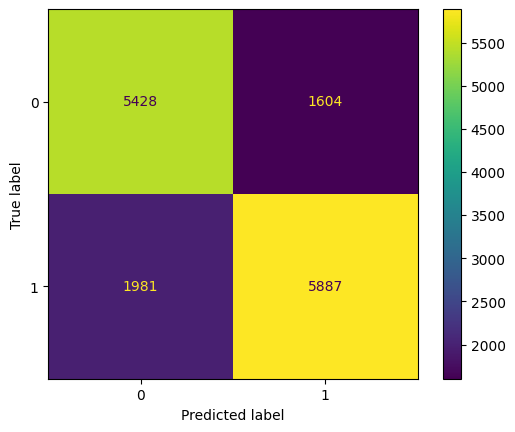

In [33]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [34]:
!pip install shap
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
explainer = shap.Explainer(final_model, X_train)

# Get SHAP values for test data
shap_values = explainer(X_test)

100%|===================| 14833/14900 [01:08<00:00]       

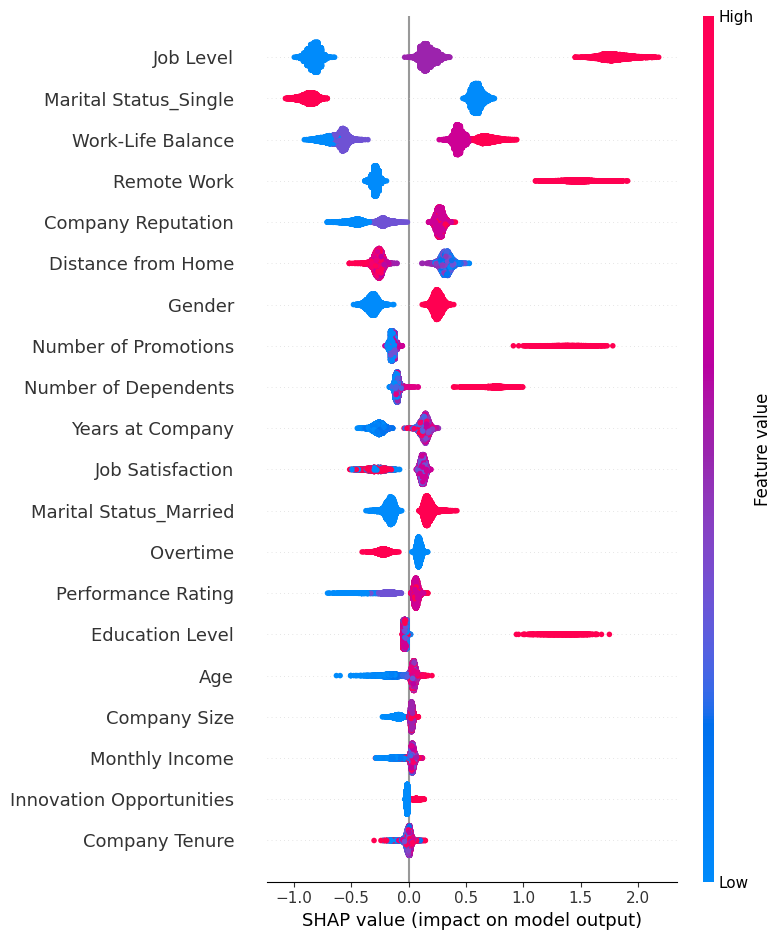

In [35]:
shap.summary_plot(shap_values, X_test)


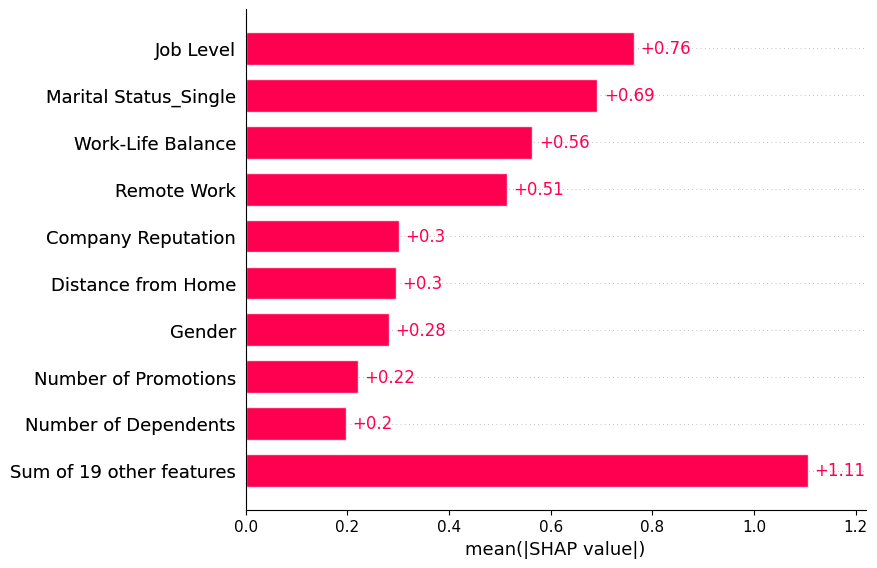

In [36]:
shap.plots.bar(shap_values)


In [22]:
X.sample(5)

,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Gender,Overtime,...,Company Size,Company Reputation,Employee Recognition,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
20308,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,2.0,42.0,15.0,9533.0,0.0,71.0,3.0,81.0
56299,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,47.0,7.0,8310.0,0.0,27.0,0.0,52.0
55945,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,1.0,35.0,15.0,8266.0,4.0,26.0,2.0,47.0
56738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,41.0,7.0,8317.0,1.0,8.0,2.0,71.0
25544,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,22.0,11.0,9960.0,0.0,55.0,1.0,28.0


In [39]:
import pandas as pd

# Step 1: Define Sample Data (Unprocessed)
sample_data = {
    'Job Role': ['Healthcare'],
    'Marital Status': ['Single'],
    'Gender': ['Female'],
    'Overtime': ['No'],
    'Remote Work': ['No'],
    'Leadership Opportunities': ['No'],
    'Innovation Opportunities': ['No'],
    'Work-Life Balance': ['Good'],
    'Job Satisfaction': ['Low'],
    'Performance Rating': ['Average'],
    'Education Level': ["Master’s Degree"],
    'Job Level': ['Entry'],
    'Company Size': ['Medium'],
    'Company Reputation': ['Good'],
    'Employee Recognition': ['GOOD'],
    'Age': [25],
    'Years at Company': [7],
    'Monthly Income': [5000],
    'Number of Promotions': [2],
    'Distance from Home': [5],
    'Number of Dependents': [1],
    'Company Tenure': [55]
}

# Convert to DataFrame
sample_df = pd.DataFrame(sample_data)

# Step 2: Transform Data Using the Same Preprocessor
transformed_sample = preprocessor.transform(sample_df)

# Step 3: Convert Transformed Data to DataFrame
transformed_df = pd.DataFrame(transformed_sample, columns=column_names)

# Step 4: Make Prediction
prediction = final_model.predict(transformed_df)

# Step 5: Convert Prediction Back to Original Form
original_prediction = le.inverse_transform(prediction)  # Reverse label encoding

# Step 6: Print Result
print("Predicted Attrition:", original_prediction[0])

# Step 5: Print Result
#print("Predicted Attrition:", "Yes" if prediction[0] == 1 else "No")


Predicted Attrition: Left


In [41]:
import joblib
joblib.dump(final_model, 'model.pkl')

['model.pkl']